In [1]:
# we first load the class module

import dipolarBEC

In [2]:
# necessary python modules

from tqdm import tqdm
import numpy as np
import os
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl        
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 14}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [7]:
#check which interaction is used and save fig in the appropriate subfolder

fv = 'NN'  # 'd' or 'NN'

path_dict = {
    'd': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\dip\\",
    'NN': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\NN\\"
}

fpath = path_dict.get(fv, "Default path")

In [8]:
#parameters

Ndisr = 100
Nmesh = 100

N0 = 2
N1=100
N2=250
N3=500

kx_small = 0.01
kx_large_dict = {'d': 8.0, 'NN': 25.0}

kx_large = kx_large_dict.get(fv, "Default value")
Uc = 1.0

#NN: Ud << Uc/2, d: Ud << Uc/3
Ud1_dict = {'d': 0.0, 'NN': 0.0}
Ud2_dict = {'d': 0.02, 'NN': 0.025}
Ud3_dict = {'d': 0.03, 'NN': 0.05}
Ud1 = Ud1_dict.get(fv, "Default value")
Ud2 = Ud2_dict.get(fv, "Default value")
Ud3 = Ud3_dict.get(fv, "Default value")

sigma1 = 0.0
sigma2 = 0.1
sigma3 = 0.2

t1 = 1.0
t2 = 10.0
t3 = 15.0

Ns = [N1, N2, N3]
kxs = [kx_small, kx_large]
sigmas = [sigma1, sigma2, sigma3]
Uds = [Ud1, Ud2, Ud3]

markers = ['s', 'o', '^']

In [9]:
#riemann sum integration - used for the viscosity
def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

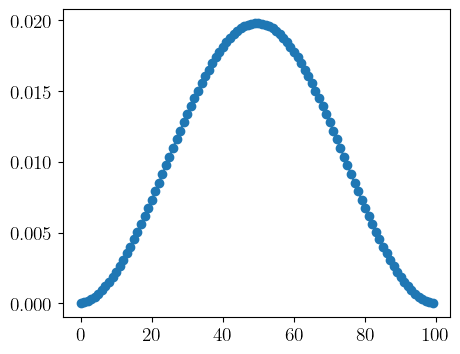

In [6]:
# first try: just run for a fixed N 

Ntubes = Ns[0]
kx = kxs[1]
Ud = Uds[1]
sigma = sigmas[0]

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

def func(x, a, L):
    return a * np.exp(x/L)

run = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

val,U,V = run.BogUV(nb)
#np.set_printoptions(precision=5, suppress=True)
#print(U)
#print(V)

xdata = range(len(run.wfLowestState()))
ydata = run.wfLowestState()

#popt, pcov = curve_fit(func, xdata, ydata)
# Print the optimal parameters a, L
#print("Optimal parameters are: a=%f, L=%f" % (popt[0], popt[1]))

plt.figure(figsize=(5,4))
plt.plot(xdata, ydata, marker='o')
plt.show()

nb = [0.97704212 1.07888767]


100%|██████████| 100/100 [00:00<00:00, 5085.11it/s]

csi = [1.0128643695800403, 1.0643458342368308]



c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


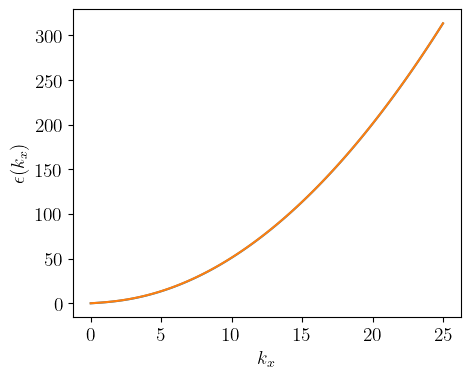

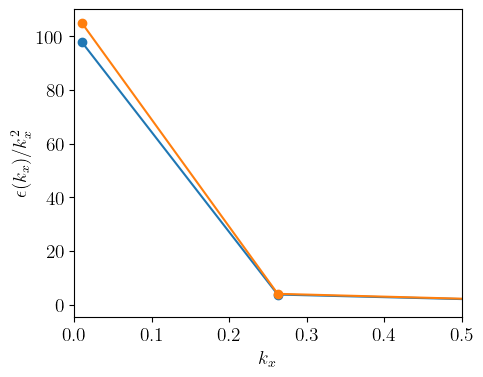

In [7]:
# check if sigma is in the correct range

Ntubes = N0
Ud = Uds[2] 
sigma = sigmas[1]

kxar = np.linspace(kxs[0], kxs[1], Nmesh)

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
print(f'nb = {nb}')

e_k = []
ed_k = []

for kx in tqdm(kxar):
    run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)
    e_k.append((run_k.BogUV(nb)[0]))
    ed_k.append((run_k.BogUV(nb)[0])/(kx**2))

ek = np.array(e_k)
edk = np.array(ed_k)
ekt = ek.T
edkt = edk.T


csi = [np.sqrt((Uc + Ud)*nb[i]) for i in range(Ntubes)] # healing length for each tube

print(f'csi = {csi}')

#ek
plt.figure(figsize=(5,4))
for i in range(len(ekt)):
    plt.plot(kxar, ekt[i], label=f'eval {i+1}')
plt.xlabel(r'$k_x$', fontsize=14)
plt.ylabel(r'$\epsilon(k_x)$', fontsize=14)
plt.show()


#edk
plt.figure(figsize=(5,4))
for i, ydata in enumerate(edkt):
    plt.plot(kxar, ydata, label=f'eval {i+1}', marker='o')
plt.xlabel(r'$k_x$', fontsize=14)
plt.ylabel(r'$\epsilon(k_x)/k_x^2$', fontsize=14)
plt.xlim(0, .5)
plt.show()


In [8]:
# let's plot u's,v's vs k for N=2 and fixed Ud,sigma

Ntubes = N0
Ud = Uds[2]
sigma = sigmas[2]

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

kdar = np.arange(kxs[0], kxs[1], 0.1)

U_k = []
V_k = []

for kx in tqdm(kdar):

    runk = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

    U_k.append( runk.BogUV(nb)[1] )
    V_k.append( runk.BogUV(nb)[2] )

# Convert U_k and V_k to numpy arrays
U_k_array = np.array(U_k)
V_k_array = np.array(V_k)

# Get the shape of the matrices
n, m, p = U_k_array.shape

100%|██████████| 250/250 [00:00<00:00, 3841.40it/s]


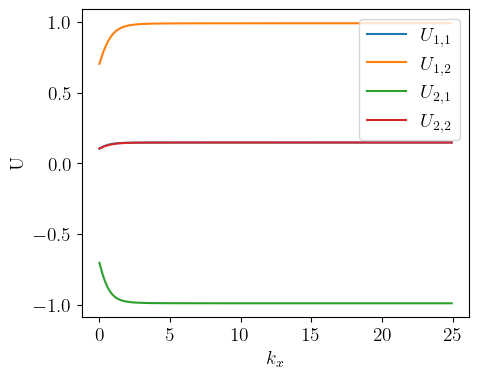

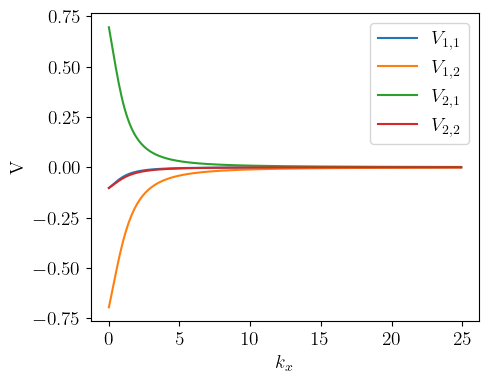

In [9]:
plt.figure(figsize=(5,4))

for i in range(m):
    for j in range(p):
        U_ij = U_k_array[:, i, j]

        # Check the sign of each U_ij by comparing it to the first element of each - viscosity not affected bc of U(1) symmetry
        
        U_ij = np.where(np.sign(U_ij[0]) == np.sign(U_ij), U_ij, -U_ij)
        
        # Now U_ij and V_ij are arrays of the (i, j) component of each matrix in U_k and V_k
        plt.plot(kdar, U_ij, label=r'$U_{{{},{}}}$'.format(i+1, j+1))


plt.ylabel("U", fontsize=14)
plt.xlabel(r"$k_x$", fontsize=14)
#plt.title('U vs k', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()


plt.figure(figsize=(5,4))

for i in range(m):
    for j in range(p):
        V_ij = V_k_array[:, i, j]
        # Check the sign of each V_ij by comparing it to the first element of each - viscosity not affected bc of U(1) symmetry
        V_ij = np.where(np.sign(V_ij[0]) == np.sign(V_ij), V_ij, -V_ij)
        # Now V_ij are arrays of the (i, j) component of each matrix in V_k
        plt.plot(kdar, V_ij, label=r'$V_{{{},{}}}$'.format(i+1, j+1))

plt.ylabel("V", fontsize=14)
plt.xlabel(r"$k_x$", fontsize=14)
#plt.title('V vs k', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

In [10]:
# now we would like to make fancy plots

In [11]:
# we're plotting the spatial (y-axis) distribution of the lowest wavefunction for three values of N=10,100,1000, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

Ud = Uds[1]
sigma = sigmas[1]

runs_sk = [dipolarBEC.dipolarBEC(N, kxs[0], Uc, Ud, Ndisr, sigma) for N in Ns]
runs_lk = [dipolarBEC.dipolarBEC(N, kxs[1], Uc, Ud, Ndisr, sigma) for N in Ns]

wf_sk = [run.wfLowestState() for run in runs_sk]
wf_lk = [run.wfLowestState() for run in runs_lk]

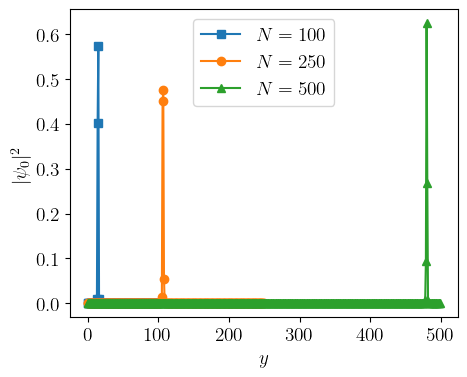

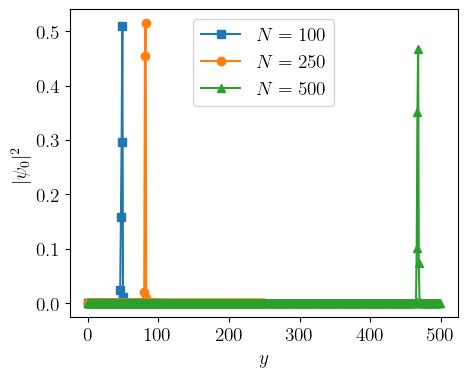

In [12]:
# function to plot the wavefunction profile of the ground state along y-axis
def plot_wf(wf, title, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(Ns)):
        plt.plot(range(len(wf[i])), wf[i], label=r'$N = {}$'.format(Ns[i]), marker=markers[i])
    plt.ylabel(r"$|\psi_0|^2$", fontsize=14)
    plt.xlabel(r"$y$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ud, sigma)) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename.format(Ud, sigma)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_wf(wf_sk, 'Small k', "wf0_vs_y_$U_d={}_s={}_sk$")

# large k
plot_wf(wf_lk, 'Large k', "wf0_vs_y_$U_d={}_s={}_lk$")

In [13]:
# we're plotting the IPR vs wavefunction index for three values of sigma, for fixed Ud/Uc and fixed N,
# at small k (_sk) and large k (_lk)

Ntubes = Ns[0]
Ud = Uds[1]

runs_sk = [dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, Ud, Ndisr, s) for s in sigmas]
runs_lk = [dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, Ud, Ndisr, s) for s in sigmas]

ipr_sk = [run.IPRAllDisr() for run in runs_sk]
ipr_lk = [run.IPRAllDisr() for run in runs_lk]

c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


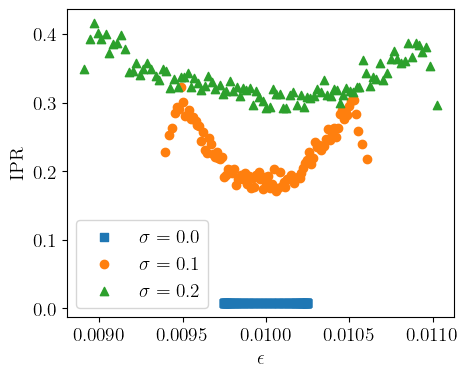

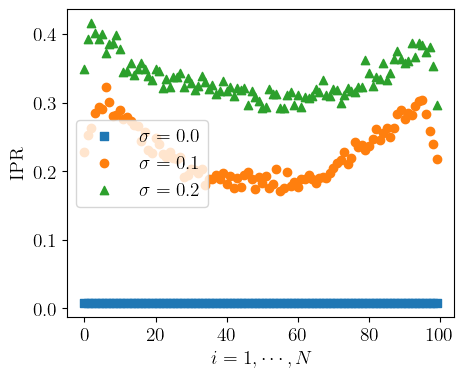

c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


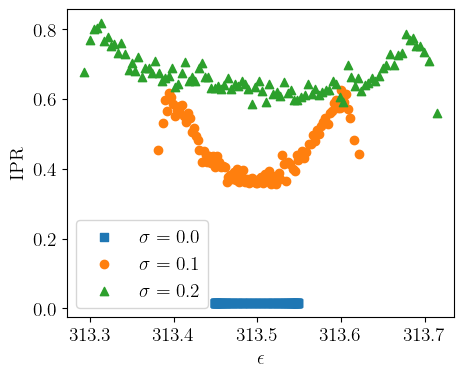

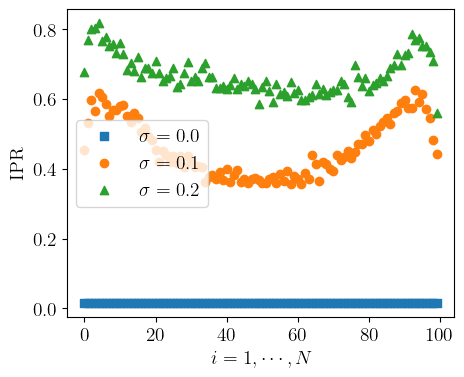

In [14]:
# plot function for IPR vs energy
def plot_allipr1_en(ipr, title, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.scatter(ipr[i][0], ipr[i][1], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$\epsilon$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# plot function for IPR vs index
def plot_allipr1_idx(ipr, title, filename):
    xdata = [range(len(ip[1])) for ip in ipr]
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.scatter(xdata[i], ipr[i][1], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$i=1,\cdots,N$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_allipr1_en(ipr_sk, 'Small k', r"alliprs_vs_energy_$U_d={}_N={}_sk$")
plot_allipr1_idx(ipr_sk, 'Small k', r"alliprs_vs_index_$U_d={}_N={}_sk$")


# large k
plot_allipr1_en(ipr_lk, 'Large k',  r"alliprs_vs_energy_$U_d={}_N={}_lk$")
plot_allipr1_idx(ipr_lk, 'Large k', r"alliprs_vs_index_$U_d={}_N={}_lk$")

In [15]:
# we're plotting ALL IPR vs N, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

Ud = Uds[1]
sigma = sigmas[1]

Ntar = [10, 50, 100, 150, 200, 250]

iprN_sk = [dipolarBEC.dipolarBEC(n, kxs[0], Uc, Ud, Ndisr, sigma).IPRAllDisr()[1] for n in tqdm(Ntar)]
iprN_lk = [dipolarBEC.dipolarBEC(n, kxs[1], Uc, Ud, Ndisr, sigma).IPRAllDisr()[1] for n in tqdm(Ntar)]

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [01:36<00:00, 16.15s/it]


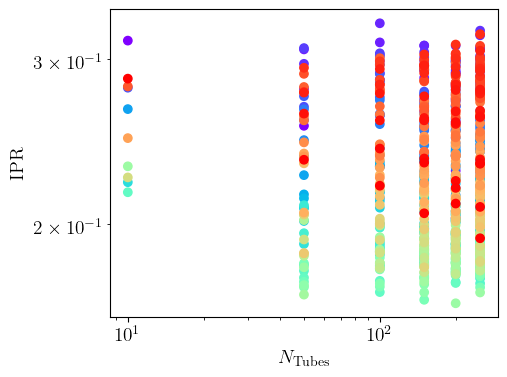

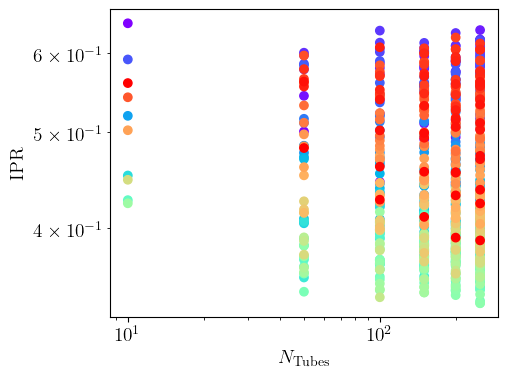

In [16]:
# plot function for IPR vs N
def plot_allipr2(ipr, title, filename):
    plt.figure(figsize=(5,4))
    for i, N in enumerate(Ntar):
        colors = cm.rainbow(np.linspace(0, 1, len(ipr[i])))
        plt.scatter([N]*len(ipr[i]), ipr[i], color=colors)
        '''for i in range(len(NtAr)): 
                colors = cm.rainbow(np.linspace(0, 1, len(ipr[i]))) 
                for j in range(len(ipr[i])):  
                    plt.scatter(NtAr[i] , ipr[i][j], color=colors[j]) 
                    plt.scatter(NtAr[i] , ipr[i][j], color=colors[j])'''
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$N_{\rm Tubes}$", fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_allipr2(iprN_sk, 'Small k', "alliprs_vs_N_sk")

# large k
plot_allipr2(iprN_lk, 'Large k', "alliprs_vs_N_lk")

In [17]:
# let us look at IPR at fix U, as a function of Ud for three values of sigma
# at small k (_sk) and large k (_lk), for N=100 tubes

Ntubes = Ns[0]

Udar = np.linspace(Ud1, Ud3, 10)

iprV_sk = [[] for _ in range(len(sigmas))]
iprV_lk = [[] for _ in range(len(sigmas))]

for ud in tqdm(Udar):
    for i, s in enumerate(sigmas):
        run_sk = dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, ud, Ndisr, s)
        run_lk = dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, ud, Ndisr, s)

        iprV_sk[i].append(run_sk.IPRDisr())
        iprV_lk[i].append(run_lk.IPRDisr())

#iprV_sk = [[dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, ud, Ndisr, s).IPRDisr() for ud in tqdm(Udar)] for s in sigmas]
#iprV_lk = [[dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, ud, Ndisr, s).IPRDisr() for ud in tqdm(Udar)] for s in sigmas]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [05:20<00:00, 32.10s/it]


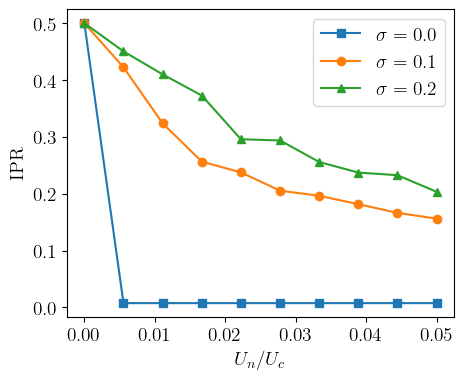

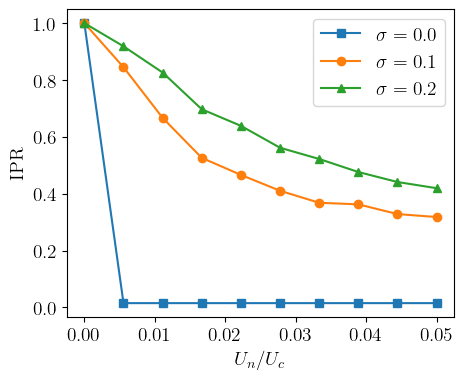

In [18]:
# plot function for IPR vs Ud
def plot_ipr_u(ipr, title, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.plot(Udar , ipr[i], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$U_n/U_c$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_ipr_u(iprV_sk, 'Small k', r'lowestipr_vs_Ud_sk')

# large k
plot_ipr_u(iprV_lk, 'Large k',  r'lowestipr_vs_Ud_lk')

In [19]:
# let us look at IPR at fix U, as a function of \sigma for three values of Ud
# at small k (_sk) and large k (_lk)

Ntubes = Ns[0]

Sigmar = np.linspace(sigma1, sigma3, 10)

iprS_sk = [[] for _ in range(len(Uds))]
iprS_lk = [[] for _ in range(len(Uds))]

for s in tqdm(Sigmar):
    for i, ud in enumerate(Uds):
        run_sk = dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, ud, Ndisr, s)
        run_lk = dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, ud, Ndisr, s)

        iprS_sk[i].append(run_sk.IPRDisr())
        iprS_lk[i].append(run_lk.IPRDisr())

#iprS_sk = [[dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, ud, Ndisr, s).IPRDisr() for s in tqdm(Sigmar)] for ud in Uds]
#iprS_lk = [[dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, ud, Ndisr, s).IPRDisr() for s in tqdm(Sigmar)] for ud in Uds]

100%|██████████| 10/10 [05:09<00:00, 30.92s/it]


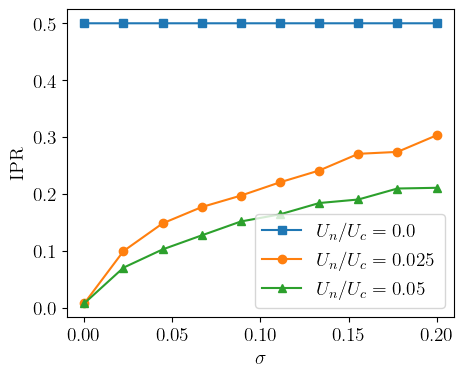

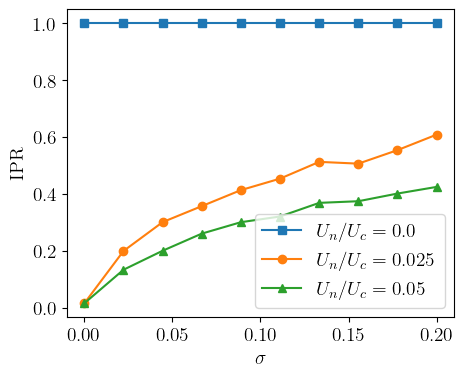

In [20]:
# plot function for IPR vs sigma
def plot_ipr_s(ipr, title, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.plot(Sigmar , ipr[i], label=r'$U_n/U_c = {}$'.format(Uds[i]), marker=markers[i])
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$\sigma$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_ipr_s(iprS_sk, 'Small k', r'lowestipr_vs_sigma_sk')

# large k
plot_ipr_s(iprS_lk, 'Large k',  r'lowestipr_vs_sigma_lk')

In [21]:
# let us look at IPR at fix U, fix Ud, as a function of Ntubes for three sigma
# at small k (_sk) and large k (_lk)

Ud = Uds[1]

Ntar = [10, 50, 100, 150, 200, 250]

iprN_sk = [[] for _ in range(len(sigmas))]
iprN_lk = [[] for _ in range(len(sigmas))]

for n in tqdm(Ntar):
    for i, s in enumerate(sigmas):
        run_sk = dipolarBEC.dipolarBEC(n, kxs[0], Uc, ud, Ndisr, s)
        run_lk = dipolarBEC.dipolarBEC(n, kxs[1], Uc, ud, Ndisr, s)

        iprN_sk[i].append(run_sk.IPRDisr())
        iprN_lk[i].append(run_lk.IPRDisr())

#iprN_sk = [[dipolarBEC.dipolarBEC(n, kxs[0], Uc, Ud, Ndisr, s).IPRDisr() for n in tqdm(Ntar)] for s in sigmas]
#iprN_lk = [[dipolarBEC.dipolarBEC(n, kxs[1], Uc, Ud, Ndisr, s).IPRDisr() for n in tqdm(Ntar)] for Ud in sigmas]

100%|██████████| 6/6 [05:08<00:00, 51.35s/it]


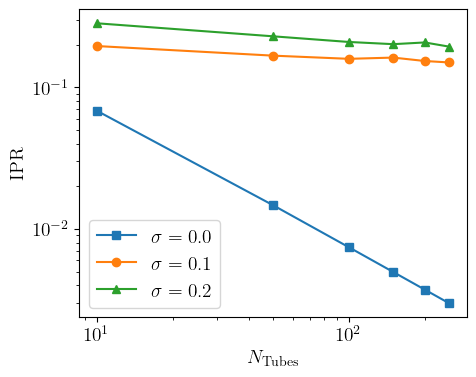

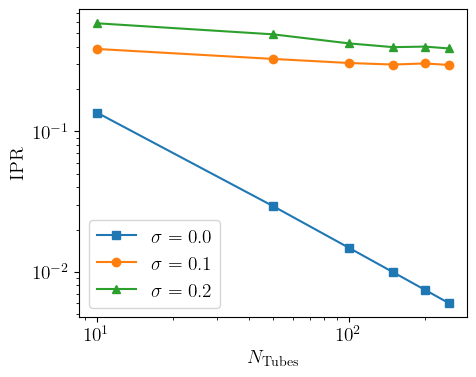

In [22]:
# plot function for IPR vs N
def plot_ipr_N(ipr, title, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.plot(Ntar , ipr[i], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$N_{\rm Tubes}$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_ipr_N(iprN_sk, 'Small k', r'lowestipr_vs_N_sk')

# large k
plot_ipr_N(iprN_lk, 'Large k',  r'lowestipr_vs_N_lk')

In [23]:
# plot of viscosity integrand (wo the oscillatory part) F_12 vs kx for a fixed Ud/Uc, Ntubes=2 (ny=1), sigma

Ntubes = N0
ny = Ntubes-1
sigma = sigmas[1]

kxar = np.linspace(kxs[0], kxs[1], Nmesh)

visc_kx = [[] for _ in range(len(Uds))]

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for kx in tqdm(kxar):
    for i, ud in enumerate(Uds):
        run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, ud, Ndisr, sigma)
        visc_kx[i].append(np.abs(run_k.visc_k_ij(ny,1,2,nb)))

100%|██████████| 100/100 [00:00<00:00, 1146.57it/s]


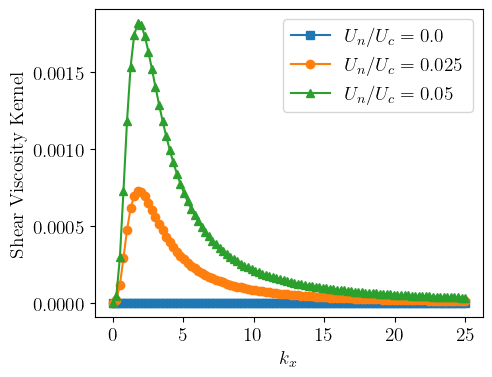

In [24]:
plt.figure(figsize=(5,4))

for i in range(len(Uds)):
    plt.plot(kxar, visc_kx[i], label=r'$U_n/U_c = {}$'.format(Uds[i]), marker=markers[i])

plt.xlabel(r"$k_x$", fontsize=14)
plt.ylabel(r"Shear Viscosity Kernel", fontsize=14)
plt.legend(loc='best', fontsize=14)
#plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma), fontsize=14)
plt.savefig(os.path.join(fpath, r'visc_intd_vs_k_N=2_sigma={}.jpg'.format(sigma)), format='jpg', bbox_inches='tight')
plt.savefig(os.path.join(fpath, r'visc_intd_vs_k_N=2_sigma={}.pdf'.format(sigma)), format='pdf', bbox_inches='tight')

plt.show()

In [38]:
# viscosity vs Ud/Uc for a fixed Ntubes, sigma, ny and t

Ntubes = N0
ny = Ntubes-1

t = t1

Udar = np.linspace(Ud1, Ud3, 10)
kxar = np.linspace(kxs[0], kxs[1], Nmesh)

nbs = [np.random.uniform(1-s, 1+s, Ntubes) for s in sigmas]
visc_ud = [[], [], []]

for ud in tqdm(Udar):
    visc_kx = [[], [], []]
    for kx in tqdm(kxar):
        for i in range(len(sigmas)):
            run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, ud, Ndisr, sigmas[i])
            visc_kx[i].append(run_k.visc_k_time(ny, t, nbs[i]))
    for i in range(len(visc_ud)):
        visc_ud[i].append(intg(kxar, visc_kx[i]))

100%|██████████| 10/10 [00:01<00:00,  6.28it/s]


c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


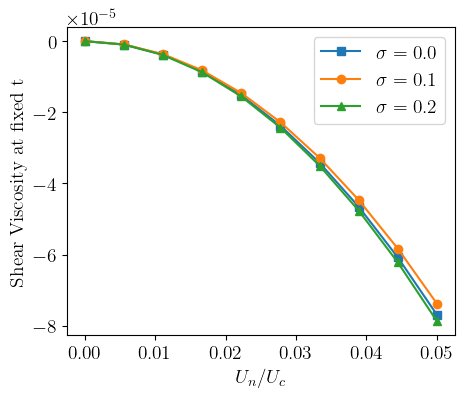

In [39]:
plt.figure(figsize=(5,4))

for i in range(len(visc_ud)):
    plt.plot(Udar, visc_ud[i], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])

plt.xlabel(r"$U_n/U_c$", fontsize=14)
plt.ylabel(r"Shear Viscosity at fixed t", fontsize=14)
plt.legend(loc='best', fontsize=14)
#plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, t = {}".format(Ntubes,ny,t), fontsize=14)
plt.savefig(os.path.join(fpath, r'visc_vs_ud_t={}.jpg'.format(t)), format='jpg', bbox_inches='tight')
plt.savefig(os.path.join(fpath, r'visc_vs_ud_t={}.pdf'.format(t)), format='pdf', bbox_inches='tight')

plt.show()

In [27]:
# viscosity vs t for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = N0
ny = Ntubes-1
sigma = sigmas[1]

tdar = np.arange(0, t2, .001)
kxar = np.linspace(kxs[0], kxs[1], Nmesh)

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
visc_t = [[], [], []]

for t in tqdm(tdar):
    visc_kx = [[], [], []]
    for kx in tqdm(kxar):
        for i, ud in enumerate(Uds):
            run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, ud, Ndisr, sigma)
            visc_kx[i].append(run_k.visc_k_time(ny, t, nb))
    for i in range(len(visc_t)):
        visc_t[i].append(intg(kxar, visc_kx[i]))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [46:47<00:00,  3.56it/s]


c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


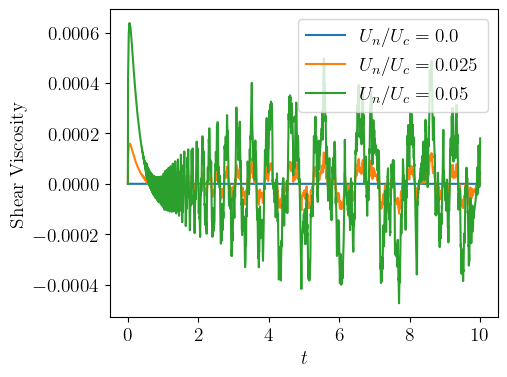

In [28]:
plt.figure(figsize=(5,4))

for i in range(len(visc_t)):
    plt.plot(tdar, visc_t[i], label=r'$U_n/U_c = {}$'.format(Uds[i]))

plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"Shear Viscosity", fontsize=14)
plt.legend(loc='best', fontsize=14)
#plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma), fontsize=14)
plt.savefig(os.path.join(fpath, r'visc_vs_t_3ud.jpg'), format='jpg', bbox_inches='tight')
plt.savefig(os.path.join(fpath, r'visc_vs_t_3ud.pdf'), format='pdf', bbox_inches='tight')


plt.show()

In [29]:
# viscosity vs t for a fixed sigma, Ntubes,  Ud/Uc, ny

Ntubes = N0
ny = Ntubes-1
Ud = Uds[1]

tdar = np.arange(0, t2, .001)
kxar = np.linspace(kx_small, kx_large, Nmesh)

nbs = [np.random.uniform(1-s, 1+s, Ntubes) for s in sigmas]
visc_t = [[], [], []]

for t in tqdm(tdar):
    visc_kx = [[], [], []]
    for kx in tqdm(kxar):
        for i, s in enumerate(sigmas):
            run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, s)
            visc_kx[i].append(run_k.visc_k_time(ny, t, nbs[i]))
    for i in range(len(visc_t)):
        visc_t[i].append(intg(kxar, visc_kx[i]))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [46:25<00:00,  3.59it/s]


c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


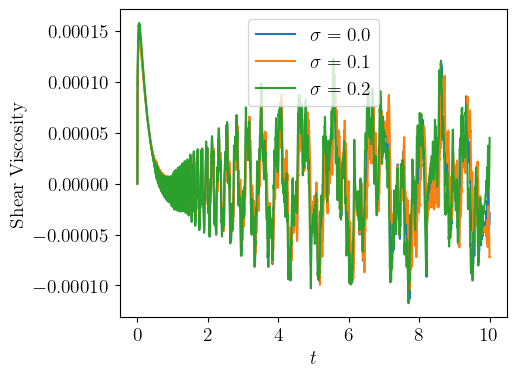

In [30]:
plt.figure(figsize=(5,4))

for i in range(len(visc_t)):
    plt.plot(tdar, visc_t[i], label=r'$\sigma = {}$'.format(sigmas[i]))

plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"Shear Viscosity", fontsize=14)
plt.legend(loc='best', fontsize=14)
#plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $U_d/U_c = {}$".format(Ntubes,ny, Ud), fontsize=14)
plt.savefig(os.path.join(fpath, r'visc_vs_t_3sigma.jpg'), format='jpg', bbox_inches='tight')
plt.savefig(os.path.join(fpath, r'visc_vs_t_3sigma.pdf'), format='pdf', bbox_inches='tight')

plt.show()

In [31]:
# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = N0
ny = Ntubes-1
sigma = sigmas[1]
gamma = 0.01

odar = np.arange(-20, 20, .02)
kxar = np.linspace(kxs[0], kxs[1], Nmesh)

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
visc_or= [[], [], []]
visc_oi= [[], [], []]

for o in tqdm(odar):
    visc_kx = [[], [], []]
    for kx in tqdm(kxar):
        for i, ud in enumerate(Uds):
            run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, ud, Ndisr, sigma)
            visc_kx[i].append(run_k.visc_k_om(ny, o, nb, gamma))
    for i in range(len(visc_or)):
        visc_or[i].append(np.real(intg(kxar, visc_kx[i])))
        visc_oi[i].append(np.imag(intg(kxar, visc_kx[i])))

100%|██████████| 2000/2000 [08:02<00:00,  4.15it/s]


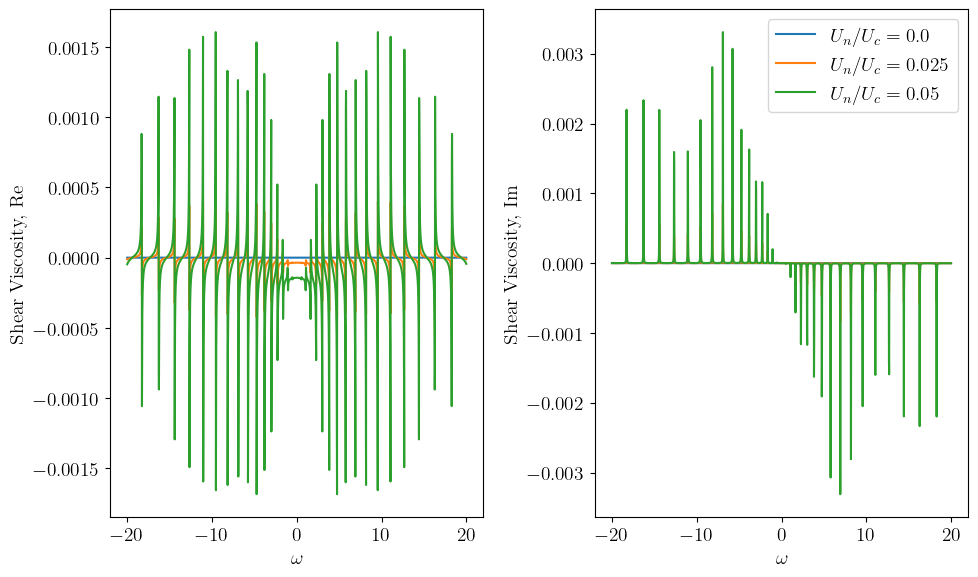

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

for i in range(len(visc_or)):
    ax1.plot(odar, visc_or[i], label=r'$U_n/U_c = {}$'.format(Uds[i]))
    ax2.plot(odar, visc_oi[i], label=r'$U_n/U_c = {}$'.format(Uds[i]))

ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"Shear Viscosity, Re")
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"Shear Viscosity, Im")
plt.legend(loc='best')
fig.tight_layout()
#fig.suptitle(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))
plt.savefig(os.path.join(fpath, r'visc_vs_om_3ud_sig={}_N={}.jpg'.format(sigma,Ntubes)), format='jpg', bbox_inches='tight')
plt.savefig(os.path.join(fpath, r'visc_vs_om_3ud_sig={}_N={}.pdf'.format(sigma,Ntubes)), format='pdf', bbox_inches='tight')


plt.show()

In [42]:
# viscosity vs ny for a fixed Ud/Uc, Ntubes, sigma, t=1

Ntubes = int(Ns[0]/10)
sigma = sigmas[2]

t = t2

ndar = np.arange(1, Ntubes-1, 1)
kxar = np.linspace(kx_small, kx_large, Nmesh)

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
visc_n = [[], [], []]

for ny in tqdm(ndar):
    visc_kx = [[], [], []]
    for kx in kxar:
        for i, ud in enumerate(Uds):
            run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, ud, Ndisr, sigma)
            visc_kx[i].append(run_k.visc_k_time(ny, t, nb))
    for i in range(len(visc_n)):
        visc_n[i].append(intg(kxar, visc_kx[i]))

100%|██████████| 8/8 [00:55<00:00,  6.99s/it]


c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


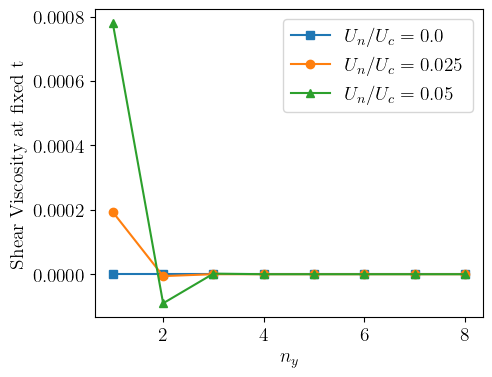

In [43]:
plt.figure(figsize=(5,4))

for i in range(len(visc_n)):
    plt.plot(ndar, visc_n[i], label=r'$U_n/U_c = {}$'.format(Uds[i]), marker=markers[i])

plt.xlabel(r"$n_y$", fontsize=14)
plt.ylabel(r"Shear Viscosity at fixed t", fontsize=14)
plt.legend(loc='best', fontsize=14)
#plt.title(r"$N = {}$ tubes, $\sigma = {}, t = {}$".format(Ntubes, sigma,t), fontsize=14)
plt.savefig(os.path.join(fpath, r'visc_vs_ny_t={}.jpg'.format(t)), format='jpg', bbox_inches='tight')
plt.savefig(os.path.join(fpath, r'visc_vs_ny_t={}.pdf'.format(t)), format='pdf', bbox_inches='tight')

plt.show()

In [14]:
# we're plotting the IPR vs wavefunction index for three values of sigma, for fixed Ud/Uc and fixed N,
# at small k (_sk) and large k (_lk)

Ud = 0.1
sigma = 0.1
Ndisr = 1 
Uc = 1.0

Ntar = [10, 50, 100]#, 150, 200, 250, 500, 1000, 2000, 5000, 10000]
kxar = [0.01]#np.linspace(kx_small, kx_large, Nmesh)

#nb = np.random.uniform(1-sigma, 1+sigma, Ntubes) #one disorder realization #in Ntubes loop

for N in Ntar:

    # nish code - feel free to delete
    tosave = []

    nb = np.random.uniform(1-sigma, 1+sigma, N)
    for k in kxar:
        # NN interaction
        run = dipolarBEC.dipolarBEC(N, k, Uc, Ud, Ndisr, sigma)
        val, ipr = run.iprAllStates(nb)

        for en, iprval in zip(val, ipr):
            tosave.append([N, en, iprval])


    tosave = np.asarray( tosave )

    np.save('test', tosave)
    

In [35]:
# fin.